# Pymaceuticals Inc.
---

### Analysis

    The data below is from Pymaceuticals, Inc., a new pharmaceutical company that specializes in anti-cancer medications. The information seen below
is from the most recent study where mice with squamous cell carcinoma (SCC), a commonly occurring form of skin cancer, were observed. 249 mice over
the course of 45 days had their tumor development recorded. 

    There were 10 different drugs used to treat the mice. The data shows that Capomulin and Ramicane were the two leaders for having the smallest tumor.
Both of these drugs had tumor sizes in the low 40mm range for the mean and median of all the mice treated by them, while the rest of the drugs were
in the 50mm range and above. 

    The lab attempted to control certain variables to prevent from skewing the results. Although there were 249 mice in the study we were able to 
indentify that 51% were male and 49% were female. Thus, lowering the variable of gender almost as much as possible. 

    Finally, the data compared tumor size to mouse weight. When looking at the scatter plot provided below it is clear that there is a positive correlation.
Not only that but it is a strong correlation of 0.84. Meaning, other variables can impact the result of mouse weight and tumor size but mouse weight
definitely plays a major factor in the mouse's tumor size. 



In [49]:
%matplotlib inline

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [51]:
# Checking the number of mice.
len(mouse_results["Mouse ID"].unique())

249

In [52]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID = mouse_results.loc[mouse_results.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [53]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = mouse_results.loc[(mouse_results["Mouse ID"] == "g989"),:]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_results.loc[(mouse_results["Mouse ID"] != 'g989'),:]
clean_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [55]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_avg = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
tumor_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_df = pd.DataFrame({
    "Mean Tumor Volume": tumor_avg,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_var,
    "Tumor Volume Std. Dev.": tumor_std,
    "Tumor Volume Std. Err.": tumor_sem
})
tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [57]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_tumor_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
agg_tumor_df



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

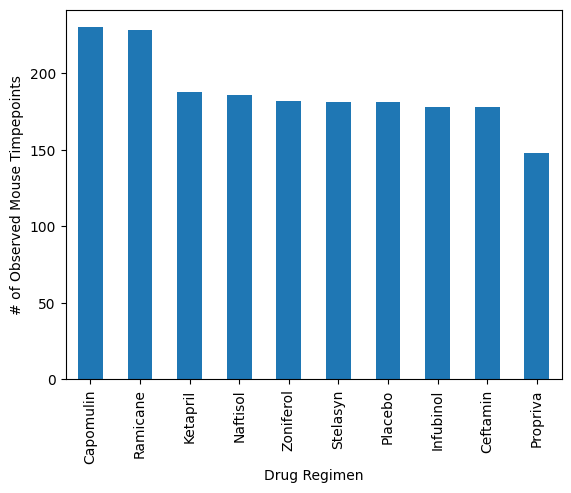

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_graph_df = clean_df["Drug Regimen"].value_counts()

bar_graph_df.plot(kind="bar", ylabel= "# of Observed Mouse Timpepoints")
plt.show()

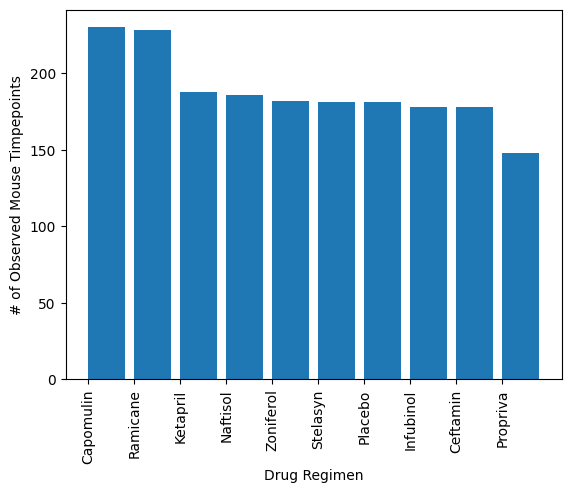

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_graph_df2 = clean_df["Drug Regimen"].value_counts()

plt.bar(bar_graph_df2.index.values, bar_graph_df2.values, align="edge")

plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timpepoints")

plt.show()

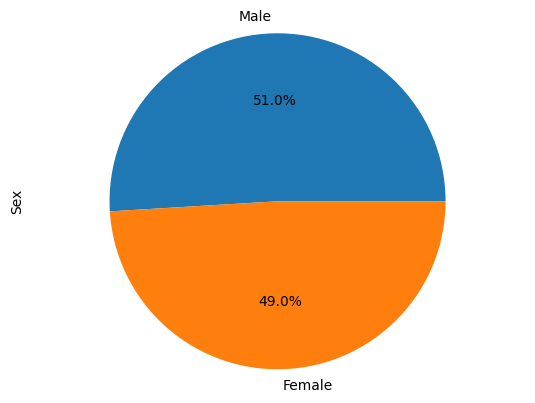

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart_df = clean_df["Sex"].value_counts()

pie_chart = pie_chart_df.plot(kind="pie", y="Sex", autopct="%1.1f%%")

pie_chart.set_ylabel("Sex")

plt.axis("equal")
plt.show()

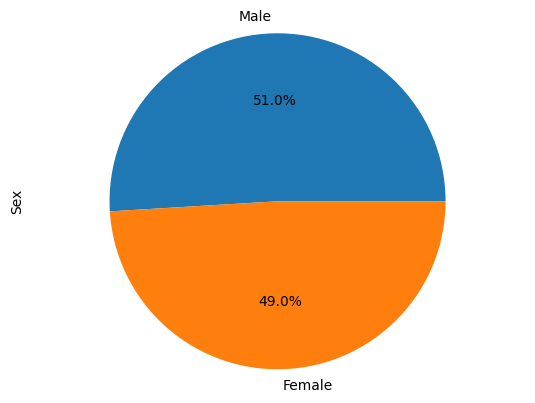

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_chart_df2 = clean_df["Sex"].value_counts()
labels = ["Male", "Female"]

plt.pie(pie_chart_df2, labels=labels, autopct="%1.1f%%")

plt.ylabel("Sex")

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby(["Mouse ID"])['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_mouse_timepoints = max_timepoint.merge(clean_df,on=['Mouse ID','Timepoint'],how="left")
max_mouse_timepoints

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [63]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names = ["Capomulin", "Ramincane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []


for treatment in treatment_names:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    max_tumor_vol = max_mouse_timepoints.loc[max_mouse_timepoints["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # add subset
    tumor_volume.append(max_tumor_vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Determine outliers using upper and lower bounds
    quartiles = max_tumor_vol.quantile([.25,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq 

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # df.loc[(df['max_speed'] > 4) | (df['shield'] < 5)]
    
    outliers = max_tumor_vol.loc[(max_tumor_vol > upper_bound) | (max_tumor_vol < lower_bound)]

print(f"Capomulin's potential outliers: {outliers}")
print(f"Ramicane's potential outliers: {outliers}")
print(f"Infubinol's potential outliers: {outliers}")
print(outliers)
print(f"Ceftamin's potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


TypeError: xticks() takes from 0 to 2 positional arguments but 4 were given

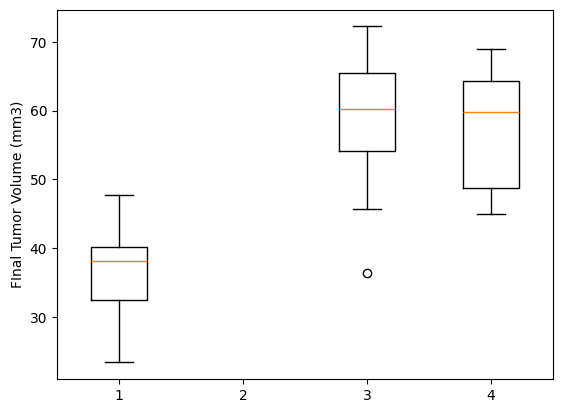

In [59]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group
plt.boxplot(tumor_volume)
plt.ylabel("FInal Tumor Volume (mm3)")
plt.xticks("Capomulin", "Ramincane", "Infubinol", "Ceftamin")
plt.show()

## Line and Scatter Plots

In [67]:
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


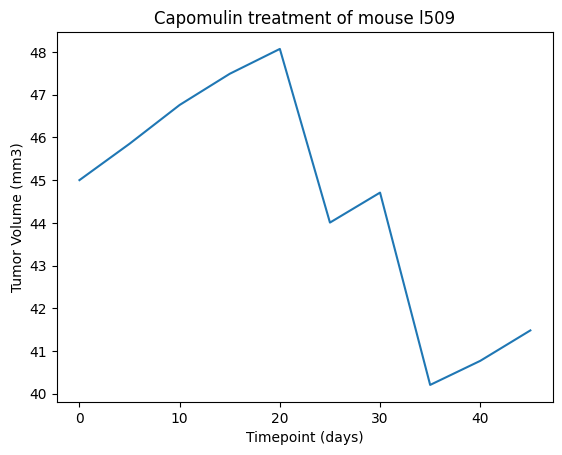

In [70]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mouse_l509 = capomulin_mice.loc[capomulin_mice["Mouse ID"] == "l509"]

plt.plot(mouse_l509["Timepoint"], mouse_l509["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")

plt.show()

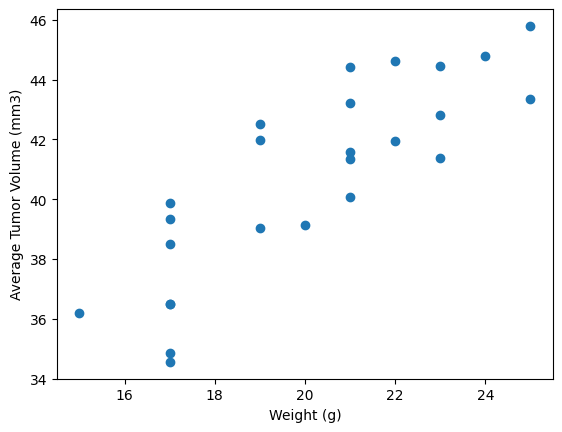

In [65]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
scatter_averages = scatter_df.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()

plt.scatter(scatter_averages["Weight (g)"], scatter_averages["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


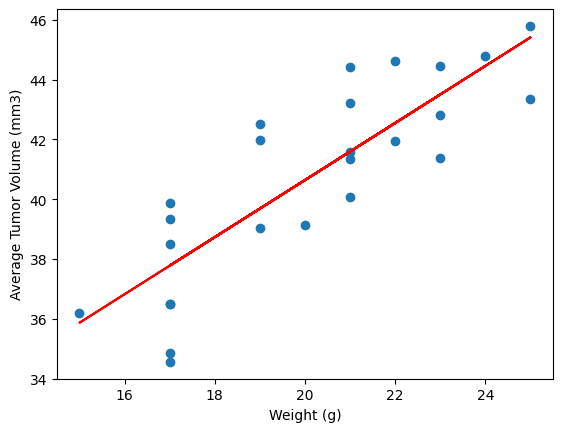

In [66]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
scatter_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
scatter_averages = scatter_df.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()

weight = scatter_averages.loc[:,"Weight (g)"]
volume = scatter_averages.loc[:,"Tumor Volume (mm3)"]
correlation = st.pearsonr(weight, volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.scatter(scatter_averages["Weight (g)"], scatter_averages["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

correlation_line = st.linregress(weight, volume)
plt.plot(scatter_averages["Weight (g)"], correlation_line.slope * scatter_averages["Weight (g)"] + correlation_line.intercept, color="red")

plt.show()